# Heart Disease Prediction using Machine Learning
## By Chintu Rai 
This notebook looks into using various *Python-based*  `Machine Learning` and `Data Science` Libraries to build a Model which can *classify/predict* whether a patient has Heart Disease or not based on various Medical Attributes

---
I will be following the below stated **6-Step Machine Learning Framework** :

1. **Problem Definition**
2. **Data**
3. **Evaluation**
4. **Features**
5. **Modeling**
6. **Experimentation**




# 1 : Problem Statement 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# 2 : Data 

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. 

# 3 : Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.
> 

# 4 : Features

**The following are the features we'll use to predict our target variable (heart disease or no heart disease).**

| Feature   | Description                                                                                                     | Example Values                                   |
|-----------|-----------------------------------------------------------------------------------------------------------------|--------------------------------------------------|
| age       | Age in years                                                                                                   | 29, 45, 60                                       |
| sex       | 1 = male; 0 = female                                                                                           | 0, 1                                             |
| cp        | Chest pain type                                                                                                | 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic |
| trestbps  | Resting blood pressure (in mm Hg on admission to the hospital)                                                 | 120, 140, 150                                    |
| chol      | Serum cholesterol in mg/dl                                                                                     | 180, 220, 250                                    |
| fbs       | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                           | 0, 1                                             |
| restecg   | Resting electrocardiographic results                                                                           | 0: Normal, 1: ST-T abnormality, 2: Left ventricular hypertrophy |
| thalach   | Maximum heart rate achieved                                                                                    | 160, 180, 190                                    |
| exang     | Exercise induced angina (1 = yes; 0 = no)                                                                      | 0, 1                                             |
| oldpeak   | ST depression induced by exercise relative to rest (possible sign of low oxygen to heart)                      | 0.5, 1.0, 2.0                                    |
| slope     | The slope of the peak exercise ST segment                                                                      | 0: Upsloping, 1: Flatsloping, 2: Downsloping      |
| ca        | Number of major vessels (0–3) colored by fluoroscopy                                                           | 0, 1, 2, 3                                       |
| thal      | Thallium stress result                                                                                         | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| target    | Presence of heart disease (1 = yes; 0 = no)                                                                    | 0, 1                                             |


> Note: No personal identifiable information (PPI) can be found in the dataset.

# Import all the libraries we are going to use

In [1]:
# 1. Data Analysis Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# 2.1 Machine Learning Models from Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# 2.2 Model Evaluation Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Exploring our Data (Exploratory Data Analysis)

In [2]:
# Getting our Data 
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


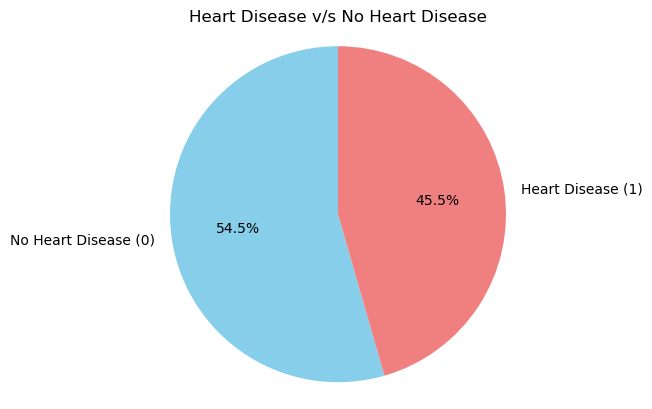

In [3]:
# Count the occurrences of 0s and 1s (Heart Disease Present or Not)
target_counts = df['target'].value_counts()

# Labels for the chart
labels = ['No Heart Disease (0)', 'Heart Disease (1)']

# Create pie chart
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.axis('equal')  # Equal aspect ratio makes it a circle
plt.title('Heart Disease v/s No Heart Disease')
plt.show()

# Comparing the heart disease in Males vs Females 

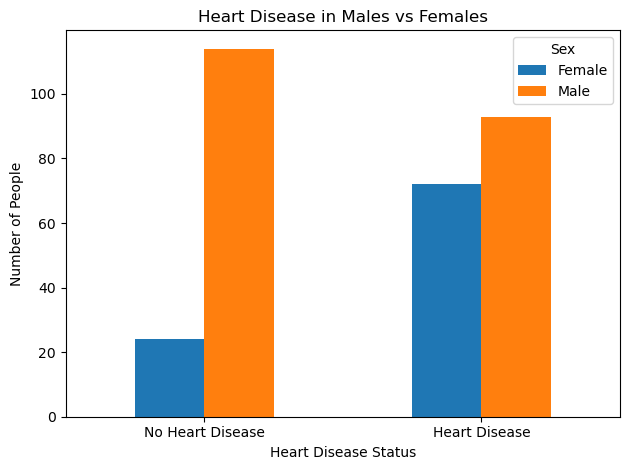

In [4]:
# 1-MALE , 0-FEMALE
ct = pd.crosstab(df["target"], df["sex"])  

# Optional: Rename for readability
ct.columns = ["Female", "Male"]
ct.index = ["No Heart Disease", "Heart Disease"]

# Plot
ct.plot(kind="bar", rot=0)
plt.title("Heart Disease in Males vs Females")
plt.xlabel("Heart Disease Status")
plt.ylabel("Number of People")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

# Comparing Age & Max Heart Rate(thalach) with Heart Disease Present or not

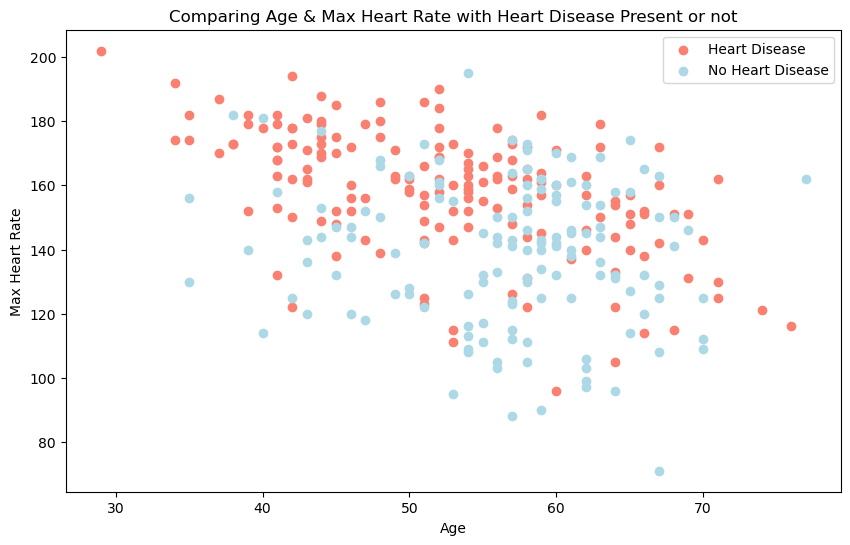

In [5]:
# Plotting a Scatter Plot
plt.figure(figsize=(10,6))

# Scatter Plot Age and Max Heart Rate who have Heart Disease
plt.scatter(
    df.age[df.target==1],
    df.thalach[df.target==1],
    c="salmon",
    label="Heart Disease"
)

# Scatter Plot Age and Max Heart Rate who dont have Heart Disease
plt.scatter(
    df.age[df.target==0],
    df.thalach[df.target==0],
    c="lightblue",
    label="No Heart Disease"
)

plt.legend()
plt.title("Comparing Age & Max Heart Rate with Heart Disease Present or not")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show();

# Comparing Chest Pain v/s Heart Disease Present or Not

> Our Data Set classifies Chest Pain `cp` into 3 types

- Feature Name : `cp`
- Meaning : Chest Pain
- Types :
 *  `0` Typical angina
 *  `1` Atypical angina
 * `2` Non-anginal pain
 * `3` Asymptomatic

In [6]:
ct_cp = pd.crosstab(df.cp, df.target)
ct_cp.columns = ["No Heart Disease", "Heart Disease"]
ct_cp.index = ["Typical angina", "Atypical angina" , "Non-anginal pain", "Asymptomatic"]
ct_cp

,No Heart Disease,Heart Disease
Typical angina,104,39
Atypical angina,9,41
Non-anginal pain,18,69
Asymptomatic,7,16


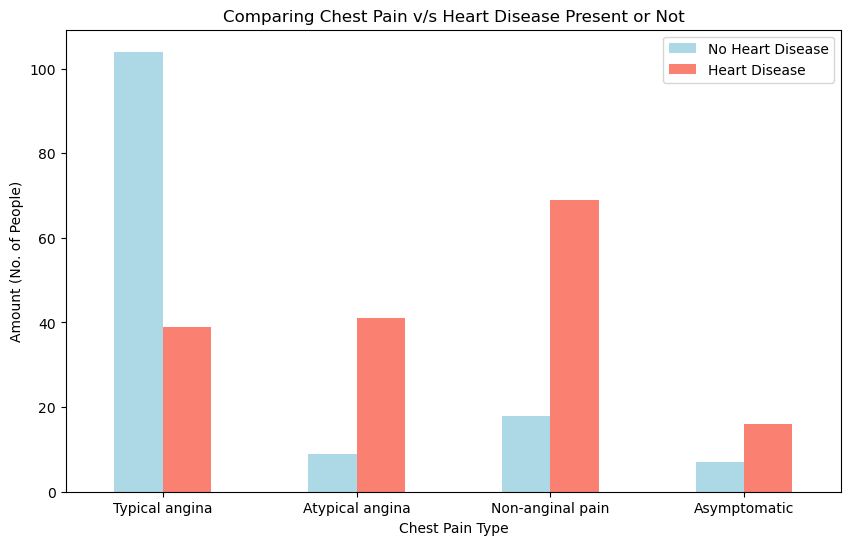

In [7]:
ct_cp.plot(kind="bar", figsize=(10,6), color=["lightblue","salmon"])
plt.title("Comparing Chest Pain v/s Heart Disease Present or Not")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=0) # To make the X Labels  Horizontal
plt.ylabel("Amount (No. of People)")
plt.legend()
plt.show();

# Exploring the Correlation between independent variables

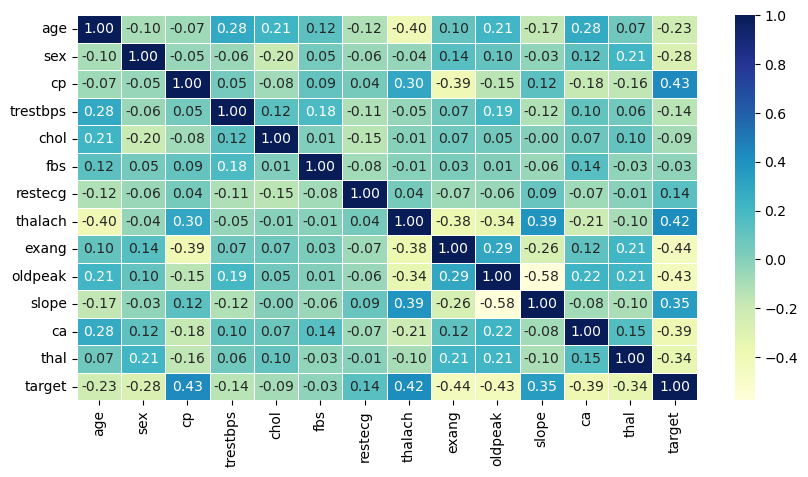

In [8]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")
plt.show();

# Modelling 

## Preparing our Data for Machine Learning

In [9]:
# Spliting the Data into Features(X) and Target(y)
X = df.drop("target", axis=1)

y = df["target"]

In [10]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [12]:
# SPLIT DATA INTO TRAINING SET AND TEST SET

np.random.seed(42) #To ensure each time the code is run same Random Numbers are generated
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Choosing the right model for our problem

In [13]:
# Put the models which we are gonna try, in a Dictionary 
models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, y_train, X_test, y_test):
    """
    Fits and Evaluates a List of Given Machine Learning Models along with the provided Train and Test Data
    """
    # Set Random Seed
    np.random.seed(42)
    
    # Scores in a Dictionary
    model_scores = {}

    # Loop throught the models and Fit & Score them
    for name , model in models.items():
        # Fitting the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and add its score to our dictionary model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [14]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Chintu Rai\Desktop\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Comparing the Baseline Model scores 

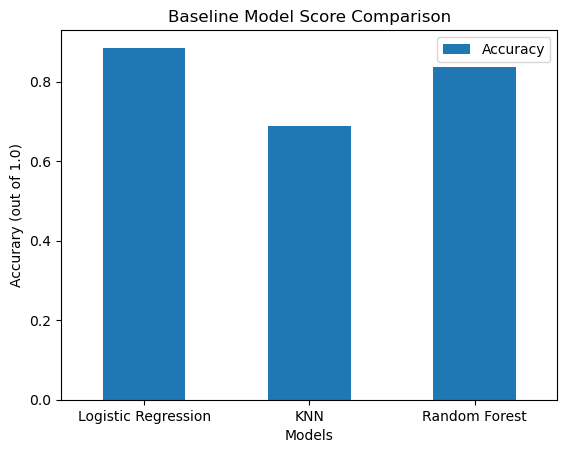

In [15]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()
plt.title("Baseline Model Score Comparison")
plt.xticks(rotation=0)
plt.xlabel("Models")
plt.ylabel("Accurary (out of 1.0)")
plt.show();

# Tuning / Improving our Model 

## We will be doing the following: 
- Tune model hyperparameters, and see which performs best
- Perform cross-validation
- Plot ROC curves
- Make a confusion matrix
- Get precision, recall and F1-score metrics
- Find the most important model features

### Hyper Parameter Tuning 

In [16]:
# Tuning the KNN Model 
train_scores = []
test_scores = []

# Trying Different Value of neighbours in KNN
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors: 
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


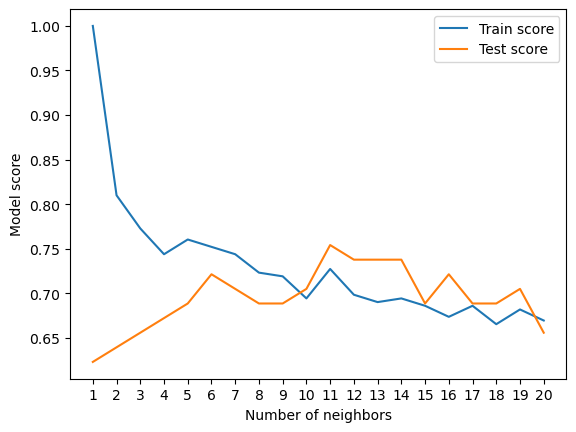

In [17]:
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.show();

## Conclusion on KNN Model

> Even after Hyper parameter tuning, the KNN Model is not able to score more than the other two models, Hence we decide to not procede with this Model

> **KNN Model** has `75.41%` accuracy *after tuning*, whereas **Logistic Regression** has `88.52%` and **Random Forest Classifier** has `83.60%` Accuracy *without even tuning* . So it's better to tune these both, instead of KNN
> 
---

## Tuning `LogisticRegression()` and `RandomForestClassifier()` using `RandomizedSearchCV`

In [18]:
# Grid for Logistic Regression 
log_reg_grid = {
    "C" : np.logspace(-4, 4, 20), # np.logspace(start, stop, num) returns num values spaced evenly on a logarithmic scale between 10^start and 10^stop.
    "solver" : ["liblinear"]
}

# Grid for Random Forest Classifier
rf_grid = {
    "n_estimators" : np.arange(10, 1000, 50),
    "max_depth" : [None, 3, 5, 10],
    "min_samples_split" : np.arange(2, 20, 2),
    "min_samples_leaf" : np.arange(1, 20, 2)
}

In [19]:
# Tune Logistic Regression

np.random.seed(42)
rs_log_reg = RandomizedSearchCV( LogisticRegression(), 
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#fit the Model which has Hyper Parameters
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [21]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### Logistic Regression Model has same `88.52%` Accuracy , even after Tuning using RandomizedSearchCV
---
### Now lets try RandomForest Model

In [22]:
# Tune Random Forest Regressor Model

np.random.seed(42)

rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

#fit the Model which has Hyper Parameters
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [23]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [24]:
rs_rf.score(X_test, y_test)

0.8688524590163934

- As we can see that Random Forest Classifier Model's Accuracy has increased to `86.88%` from `83.60%` which is an increase of `3.28%`

- But its still lower than Logistic Regression Model, so we will continue with our Logistic Regression Model 

## Now let's Try `GridSearchCV()` on `LogisticRegression()`, because it usually gives better results because it tries all possibilities.

In [25]:
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
     "solver" : ["liblinear"]
 }

gs_log_reg = GridSearchCV(LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [26]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [27]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our Model `gs_log_reg` on different Metrics

In [28]:
# First, make prediction using our model
y_preds = gs_log_reg.predict(X_test)

### ROC Curve and AUC 

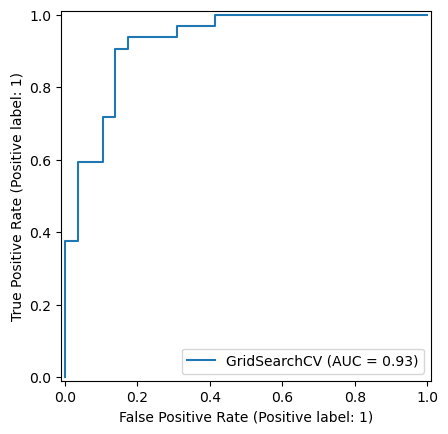

In [29]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show();

### Confusion Matrix

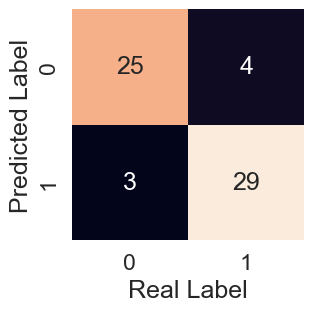

In [30]:
# Plotting a Confusion Matrix using Seaborn's Heat Map

sns.set(font_scale =1.5)

#function
def plot_conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("Real Label")
    plt.ylabel("Predicted Label")
    plt.show();

plot_conf_matrix(y_test=y_test, y_preds=y_preds)

### Classification Report

In [31]:
# check the best parameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [32]:
# Create a new Model with the best parameters
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [33]:
# Cross Validated Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [34]:
# Cross Validated Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [35]:
# Cross Validated Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [36]:
# Cross Validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

In [55]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8360655737704918
Confusion Matrix:
 [[19  9]
 [ 1 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

ROC-AUC Score: 0.9080086580086579


In [37]:
# Visualizing the cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy" : cv_acc , 
    "Precision" : cv_precision ,
    "Recall" : cv_recall,
    "f1" : cv_f1},
     index=[0])

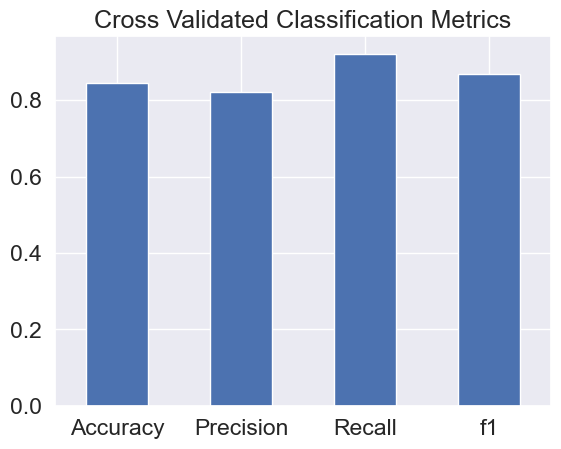

In [38]:
cv_metrics.T.plot.bar(title= "Cross Validated Classification Metrics", legend=False);
plt.xticks(rotation=0)
plt.show();

### Feature Importance

In [39]:
# Fit an instance of the LogisticRegression Model, with best params
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")
clf.fit(X_train, y_train);

In [40]:
# Check coef_ ( to get the learned weights for each feature.)
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [41]:
# Match coef of features with columns
feature_dict = dict( zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

### This Co-Efficient shows the weightage of each column, like the Contribution of each in determining the value of Target, So we can decide which feature is most important

### Meaning of Sign of the coefficient:

- `Positive (+)` → The feature *increases* the likelihood of the `target` being `1`.

- `Negative (−)` → The feature *decreases* the likelihood of the `target` being `1`.


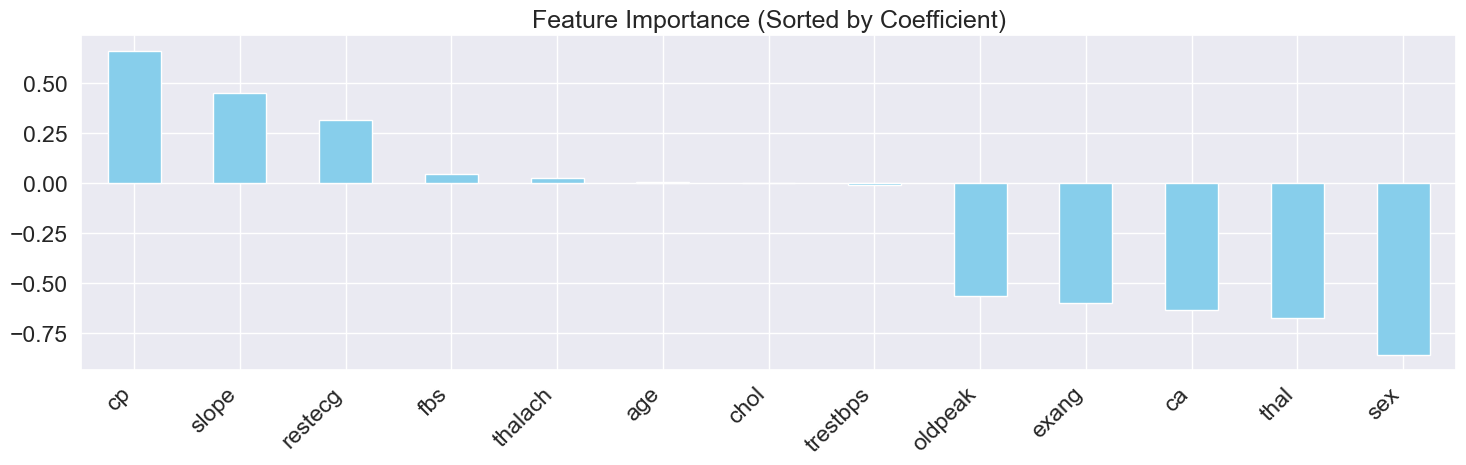

In [42]:
# Visualizing it
feature_df = pd.DataFrame(feature_dict, index=[0])

# Transpose and sort by actual coefficient value
sorted_df = feature_df.T.copy()
sorted_df.columns = ['Coefficient']
sorted_df = sorted_df.sort_values(by='Coefficient', ascending=False)

# Plot the sorted coefficients
sorted_df.plot.bar(
    title="Feature Importance (Sorted by Coefficient)",
    figsize=(15, 5),
    legend=False,
    color='skyblue'
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### From above Graph we can conclude that `cp` (chest pain) is the most important feature in finding out whether a person has Heart Disease `1` or not `0`

### Second most important feature turns out to be `slope` which represents "downslopins-signs of an unhealthy heart" (Biological Terminology)

# Trying XGBoost Model


In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_auc_score
)
from xgboost import XGBClassifier, plot_importance

In [51]:
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Define model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Stratified 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search on scaled training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\Chintu Rai\Desktop\sample_project_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:22] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [54]:
# Best model
best_xgb = grid_search.best_estimator_

# Predict
y_pred = best_xgb.predict(X_test_scaled)
y_prob = best_xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8360655737704918
Confusion Matrix:
 [[19  9]
 [ 1 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

ROC-AUC Score: 0.9080086580086579


### Saving and Exporting the model

In [57]:
import pickle

# Save
with open('heart_disease_model.pkl', 'wb') as file:
    pickle.dump(gs_log_reg, file)

---

## 📌 Conclusion

In this project, we developed a heart disease classification model by experimenting with multiple machine learning algorithms including **Logistic Regression** and **XGBoost**, along with hyperparameter tuning and performance evaluation using metrics like accuracy, F1-score, and ROC-AUC.

### 🔍 Model Comparison Summary

| Metric                  | Logistic Regression | XGBoost |
| ----------------------- | ------------------- | ------- |
| **Accuracy**            | **0.84**            | **0.84**    |
| **ROC-AUC Score**       | **0.908**           | 0.900   |
| **F1-Score (Class 1)**  | **0.86**            | 0.83    |
| **Recall (Class 1)**    | **0.97**            | 0.91    |
| **Precision (Class 0)** | **0.95**            | 0.86    |

As seen from the results above, **Logistic Regression consistently outperforms XGBoost** and also other models tested above, especially in critical metrics like:

* Higher **recall for class 1**, meaning it identifies more patients with heart disease.
* Higher **ROC-AUC**, indicating better overall classification performance.
* Comparable or better **F1-score**, ensuring a balanced performance between precision and recall.

### ✅ Final Decision

After thorough experimentation and tuning, we selected **Logistic Regression** as our final model due to its simplicity, interpretability, and **superior performance** on our dataset.

> 🎯 **Final Accuracy: 84%**
> 🚑 **ROC-AUC Score: 0.908**

This model can now be confidently used to predict the presence of heart disease and assist in preliminary medical decision-making.

---